<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#business_problem">Business Problem</a></li>
        <li><a href="#understand">Exploratory Data Analysis</a></li>
        <li><a href="#preprocess">Feature Engineering</a></li>
        <li><a href="#build">Model Building</a></li>
        <li><a href="#recommendation">Recommendations</a></li>
        <li><a href="#improvement">Room for Improvement</a></li>
    </ol>
</div>
<br>
<hr>

In [190]:
#import the basic libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

<div id="business_problem">
    <h2>Business Problem</h2>
</div>

**Case Summary**

BeachBoys BikeShare is a bike share service provider. They are interested in using a predictive model to predict the number of bikes taken and returned to each station. It will help out their logistic department to redistribute the bikes to each station for their customer usage.

**Key Question**

What is the net rate of renting for a given station? (Net rate is defined as trip ended minus trips started at the station for a given hour)

<div id="understand">
    <h2>Exploratory Data Analysis </h2>
</div>

*Import the Data*

In [260]:
station= pd.read_csv( r"C:\Users\glori\OneDrive\Desktop\Bain\station_data.csv",index_col=False)
trip= pd.read_csv( r"C:\Users\glori\OneDrive\Desktop\Bain\trip_data.csv",index_col=False)
weather= pd.read_csv( r"C:\Users\glori\OneDrive\Desktop\Bain\weather_data.csv",index_col=False)

In [261]:
#preview station data
station.head()

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


In [262]:
#preview trip data
trip.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


In [263]:
trip.shape #size of trip dataframe

(354152, 6)

In [264]:
#preview weather data
weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


In [265]:
weather.columns #understand the column names

Index(['Date', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressureIn',
       'Mean Sea Level PressureIn', 'Min Sea Level PressureIn',
       'Max VisibilityMiles', 'Mean VisibilityMiles', 'Min VisibilityMiles',
       'Max Wind SpeedMPH', 'Mean Wind SpeedMPH', 'Max Gust SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees', 'Zip'],
      dtype='object')

In [266]:
weather.drop(columns=['Events'],inplace=True) #drop unrelevant feature Event because it is mostly NA

In [267]:
weather.Zip.loc[(weather['Zip']== 94107)] = 'San Francisco'
weather.Zip.loc[(weather['Zip']== 94063)] = 'Redwood City'
weather.Zip.loc[(weather['Zip']== 94301)] = 'Palo Alto'
weather.Zip.loc[(weather['Zip']== 94041)] = 'Mountain View'
weather.Zip.loc[(weather['Zip']== 95113)] = 'San Jose' #change zip to city

C:\Users\glori\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [268]:
weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,10.0,8.0,16.0,7.0,20.0,0.0,0.0,290.0,San Francisco
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,10.0,7.0,21.0,8.0,NaN,0.0,5.0,290.0,San Francisco
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,10.0,21.0,8.0,24.0,0.0,4.0,276.0,San Francisco
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,10.0,8.0,22.0,8.0,25.0,0.0,5.0,301.0,San Francisco
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,10.0,9.0,7.0,18.0,8.0,32.0,0.0,4.0,309.0,San Francisco


In [269]:
#find out the size of the dataframe
weather.shape

(1825, 23)

In [270]:
weather.describe() #descriptive statistics for each column

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
count,1821.000000,1821.000000,1821.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1824.000000,...,1824.000000,1820.000000,1820.000000,1820.000000,1824.000000,1824.000000,1284.000000,1824.000000,1824.000000,1824.000000
mean,70.637013,61.837452,52.733663,54.460845,50.397183,46.135775,87.505915,69.282817,48.769014,30.070641,...,29.962659,10.475275,9.636813,7.948901,16.347588,6.150219,21.690810,0.025032,3.110746,260.584430
std,8.260028,6.893216,7.037803,6.330125,7.101097,8.548960,8.537459,10.408295,14.274316,0.135416,...,0.132534,2.083719,1.433697,2.993878,8.592296,3.238621,6.052399,0.177212,2.297131,95.985517
min,50.000000,41.000000,30.000000,20.000000,13.000000,4.000000,25.000000,25.000000,4.000000,29.670000,...,29.340000,5.000000,4.000000,0.000000,4.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,64.000000,57.000000,48.000000,50.000000,47.000000,41.000000,83.000000,64.000000,40.000000,29.970000,...,29.870000,10.000000,10.000000,6.000000,12.000000,4.000000,18.000000,0.000000,1.000000,242.000000
50%,70.000000,61.000000,53.000000,55.000000,51.000000,48.000000,88.000000,70.000000,50.000000,30.050000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,0.000000,3.000000,295.000000
75%,76.000000,67.000000,58.000000,59.000000,56.000000,53.000000,93.000000,75.000000,57.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,0.000000,5.000000,328.000000
max,102.000000,82.000000,75.000000,68.000000,64.000000,63.000000,100.000000,96.000000,86.000000,30.480000,...,30.360000,20.000000,20.000000,20.000000,128.000000,23.000000,62.000000,3.360000,8.000000,360.000000


In [271]:
start=trip[['Start Date','Start Station']]  #create a new dataframe to find out number of bikeouts on each day

In [272]:
start['Day'], start['Time'] =start['Start Date'].str.split(' ', 1).str #Split the Date and Time in StartDate

C:\Users\glori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [273]:
start=start[['Day','Start Station']]
start.head()

,Day,Start Station
0,31/08/2015,50
1,31/08/2015,31
2,31/08/2015,47
3,31/08/2015,10
4,31/08/2015,51


In [276]:
end=trip[['End Date','End Station']]  #create a new dataframe to find out number of bikeins on each day

In [277]:
end['Day'], end['Time'] =end['End Date'].str.split(' ', 1).str #Split the Date and Time in End Date

C:\Users\glori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
end=end[['Day','End Station']]
end.head()

,Day,End Station
0,31/08/2015,70
1,31/08/2015,27
2,31/08/2015,64
3,31/08/2015,8
4,31/08/2015,60


In [281]:
bikeout=start.groupby(['Day','Start Station']).size().reset_index(name="BikeOut") #get the number of bikeouts and bikeins in each station on each day
bikein=end.groupby(['Day','End Station']).size().reset_index(name="BikeIn")

In [279]:
bikeout.head()

,Day,Start Station,BikeOut
0,01/01/2015,2,2
1,01/01/2015,3,1
2,01/01/2015,6,1
3,01/01/2015,7,1
4,01/01/2015,30,1


In [280]:
bikein.head()

,Day,End Station,BikeIn
0,01/01/2015,2,2
1,01/01/2015,3,1
2,01/01/2015,7,1
3,01/01/2015,13,1
4,01/01/2015,30,1


**For now we focus on only one station,say Station 60**

In [284]:
out_60=bikeout.loc[bikeout['Start Station']==60] #select data where No. of station is 60
in_60=bikein.loc[bikein['End Station']==60]
diff=pd.merge(out_60, in_60, on='Day') #merge two table together

In [285]:
 diff['NetRate']=(diff['BikeIn']-diff['BikeOut'])/24 #calculate netrate

In [287]:
diff.head()

,Day,Start Station,BikeOut,End Station,BikeIn,NetRate
0,01/01/2015,60,12,60,17,0.208333
1,01/02/2015,60,29,60,27,-0.083333
2,01/03/2015,60,24,60,36,0.500000
3,01/04/2015,60,46,60,58,0.500000
4,01/05/2015,60,57,60,61,0.166667


In [288]:
df = weather[weather.set_index(['Date']).index.isin(diff.set_index(['Day']).index)] # create a dataframe where there is corresponding weather data and NetRate 

In [289]:
df.rename(columns={'Date': 'Day'}, inplace=True) #change name

C:\Users\glori\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [290]:
station.loc[station.Id==60] # find out the city of No. 60 station

,Id,Name,Lat,Long,Dock Count,City
51,60,Embarcadero at Sansome,37.80477,-122.403234,15,San Francisco


In [164]:
df =df[df.Zip=='San Francisco'] # select the weather data where the city is SF

In [291]:
final=pd.merge(df,diff, on='Day') # merge two weather date and NetRate

In [292]:
final.drop(['Zip', 'BikeOut','BikeIn','End Station'], axis=1,inplace=True)

In [295]:
final.shape #size

(1630, 24)

In [296]:
final.rename(columns={'Start Station': 'Station Number'}, inplace=True)
final.drop(columns={'Station Number'}, inplace=True,axis=1) #drop Station Number because is unrelevant

**Our Final Dataframe with all the info we need**

In [297]:
final.head()

,Day,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,NetRate
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,10.0,8.0,16.0,7.0,20.0,0.0,0.0,290.0,0.5
1,01/09/2014,89.0,74.0,60.0,64.0,56.0,52.0,82.0,67.0,27.0,...,10.0,10.0,10.0,12.0,2.0,NaN,0.0,0.0,339.0,0.5
2,01/09/2014,86.0,72.0,57.0,66.0,63.0,55.0,94.0,69.0,43.0,...,15.0,10.0,10.0,17.0,6.0,22.0,0.0,0.0,351.0,0.5
3,01/09/2014,85.0,73.0,60.0,60.0,58.0,53.0,84.0,59.0,34.0,...,10.0,10.0,10.0,17.0,5.0,21.0,0.0,0.0,342.0,0.5
4,01/09/2014,86.0,72.0,58.0,60.0,54.0,50.0,86.0,59.0,31.0,...,10.0,10.0,10.0,17.0,5.0,22.0,0.0,0.0,296.0,0.5


*Correlation*

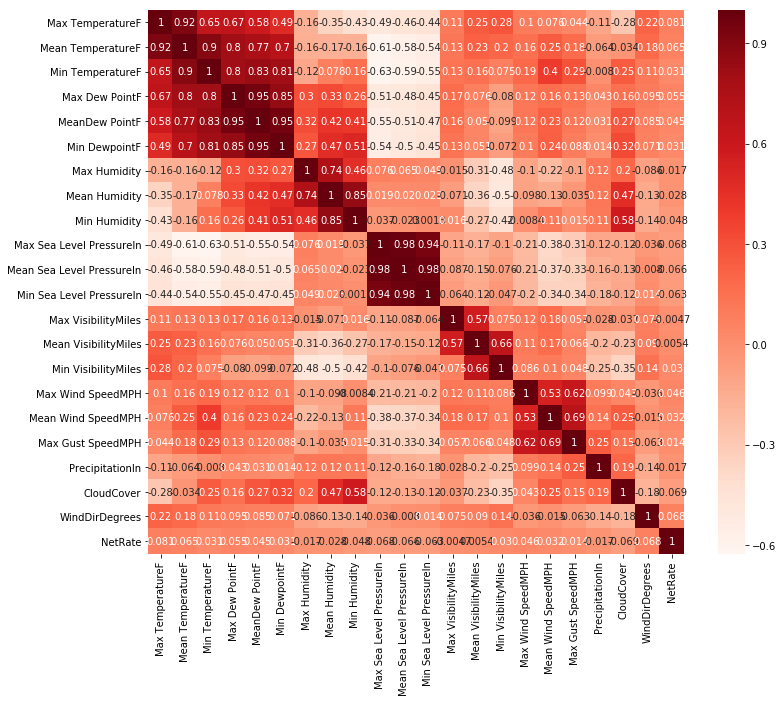

In [304]:
plt.figure(figsize=(12,10))
cor = final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Note that NetRate has low correlation coefficients with all the features**

In [305]:
features= final[final.columns.difference(['Day','Net Rate'])] #create a dataframe only focuses on features

<div id="preprocess">
    <h2>Feature Engineering </h2>
</div>

*Missing Values*

In [313]:
features.isnull().sum()
features.fillna(features.mean(),inplace=True)# Find out missing values and replace it with column mean

C:\Users\glori\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<div id="build">
    <h2>Model Building</h2>
</div>

Here I test out a bunch of models mainly regression models to see which has the best accuracy
1. The predicted value is a numerical continuous value
2. The feature values are all numerical

In [314]:
from sklearn.model_selection import train_test_split
X=features.values
y=final.NetRate.values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [315]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
import math

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]



for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train,y_train)
    y_test_pred=clf.predict(X_test)
    print(math.sqrt(metrics.mean_squared_error(y_test, y_test_pred, sample_weight=None, multioutput='uniform_average')))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\glori\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.39855472641596246
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
109557450160102.94
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
7.574200017115825e-11
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
0.3983428223741792
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
      

C:\Users\glori\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


70.70054578039853
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
              epsilon=0.1, fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, n_iter_no_change=5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
1.06509530235443
TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=None, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)


C:\Users\glori\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


4.76074580221047e-15
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
9.44309897986417e-16


<div id="recommendation">
    <h2>Recommendations</h2>
</div>

As we can tell from the above RMSEs from different models that we adopted, Linear Regression has the smallest RMSE thus is the most accurate model to predict net rate.

<div id="improvement">
    <h2>Room for Improvement</h2>
</div>

1. Since the feature size is very large and have very low correlation with the predicted value, I would focus more on Feature Selection to narrow down the feature size to prevent overfitting

2. Due to the time limit, I only use one station as an example, but I would build a loop to identify the best model for all the stations.

3. I would identify the ouliers by creating box plot visualization and using a range of  medium-n*standard devidation medium+n*standard devidation where n is a number between 2-4

4. I would use K fold cross validation to spit the data into K folds as training and testing sets, then take the average of MSEs from a specific model for K different combinations of train/test data 